# Assignment 3

Under New York City's stop and frisk policy, millions of New Yorkers were stopped, questioned, and frisked by the police in a widespread effort to find drugs, weapons, and other illegal contraband. As we will discuss in class, this policy was found to be unconstitutional by a federal judge in 2013 (Floyd v. City of New York) on the grounds that it violated the Fourth Amendment (which prohibits unreasonable searches) and Fourteenth Amendment (which prohibits racial discrimination). Here, we use spatial data analysis techniques, applied to [stop and frisk data](https://5harad.com/data/sqf.RData), to examine some of the evidence which led to the ruling that the policy was racially discriminatory.

## Part 1

In this part, you will make a map of where the stops occur and the race of stopped pedestrians. You will make use of two data sources: the stop and frisk data, and a shapefile of New York City. 


**Processing stop and frisk data**. Read in the CSV *sqf.csv*, which contains the stop and frisk locations. Filter for stops with *suspected.crime* as "cpw" in NYC from 2011 to 2012: these are stops conducted because the police suspected the pedestrian was illegally carrying a weapon. When analyzing the race of the stopped pedestrian, treat both Black Hispanic and white Hispanic pedestrians as Hispanic, and in this assignment we will only consider four racial/ethnic groups (white, black, Hispanic and Asian). Turn the CSV into a geodataframe, with a geometry column, as described in lecture. The geometry column should be a point with the latitude and longitude of each stop. 


In [40]:
import pandas as pd
import geopandas as gpd

df = pd.read_csv("A3_data/sqf.csv")
df.shape

/Users/daan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7,18,19,20,66,77) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(4086146, 88)

We start by filtering the dataframe to find crimes with suspected.crime as `cpw` that occurred from 2011 to 2012.

In [41]:
df = df[(df.year >= 2011) & (df.year <= 2012)]
df.shape

(1212679, 88)

In [42]:
df = df[df['suspected.crime'] == 'cpw']
df.shape

(303684, 88)

In [43]:
df['suspect.race'].unique()

array(['black', 'white hispanic', 'white', 'other', 'black hispanic',
       'asian', nan, 'native american'], dtype=object)

Next, we normalize "white hispanic" and "black hispanic" as hispanic, filter down the dataset to crimes that target black, hispanic, white or asian suspects and turn the dataframe into a geodataframe.

In [44]:
def replace_hispanic(string):
    if string in ['white hispanic', 'black hispanic']:
        return 'hispanic'
    else:
        return string

df['race_updated'] = df['suspect.race'].apply(lambda x: replace_hispanic(x))
df['race_updated'].unique()

array(['black', 'hispanic', 'white', 'other', 'asian', nan,
       'native american'], dtype=object)

In [45]:
df = df[df['race_updated'].isin(['black', 'hispanic', 'white', 'asian'])]
df.shape

(294217, 89)

In [46]:
df['race_updated'].unique()

array(['black', 'hispanic', 'white', 'asian'], dtype=object)

In [47]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat))
gdf.shape

(294217, 90)

In [48]:
gdf.geometry

2682507    POINT (-73.80767 40.58797)
2682508    POINT (-73.80767 40.58797)
2682509    POINT (-73.80767 40.58797)
2682510    POINT (-73.80767 40.58797)
2682511    POINT (-73.75778 40.60583)
                      ...            
3895077               POINT (nan nan)
3895117    POINT (-74.15397 40.53427)
3895123    POINT (-74.17723 40.54020)
3895146    POINT (-74.22038 40.53178)
3895148    POINT (-74.18129 40.52572)
Name: geometry, Length: 294217, dtype: geometry

**Processing NYC shapefile**. Read in the New York shapefile (original data source: [census data](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-data.2012.html)) from 'ACS_2012_5YR_TRACT_36_NEW_YORK.gdb'. For this part of the assignmment, you will only need one layer of this shapefile, which you can read in by using

`gpd.read_file('ACS_2012_5YR_TRACT_36_NEW_YORK.gdb', layer='ACS_2012_5YR_TRACT_36_NEW_YORK')`

(See [here](https://geopandas.org/docs/user_guide/io.html) for more documentation about how to load only some data from a shapefile, which can be faster; you can also use the ["listlayers" function in the fiona package to check which layers exist in the shapefile](https://fiona.readthedocs.io/en/latest/manual.html#reading-multilayer-data). Later in the assignment, you will need to use other layers from the shapefile, and you can use these functions to find the layers you need.)

You only need to select five NYC counties in NY shapefile, and their FIPS codes are 005 (Bronx County), 047 (Kings County), 061 (New York County), 081 (Queens County), and 085 (Richmond County).

In [49]:
df_nyc = gpd.read_file('A3_data/ACS_2012_5YR_TRACT_36_NEW_YORK.gdb', layer='ACS_2012_5YR_TRACT_36_NEW_YORK')
df_nyc.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Length,Shape_Area,GEOID_Data,geometry
0,36,031,960800,36031960800,9608,Census Tract 9608,G5020,S,110652874.0,79410211.0,+44.3854982,-073.3987030,0.641186,0.021464,14000US36031960800,"MULTIPOLYGON (((-73.49958 44.39684, -73.49780 ..."
1,36,031,960700,36031960700,9607,Census Tract 9607,G5020,S,301527007.0,16004586.0,+44.2939648,-073.5215464,0.999294,0.035807,14000US36031960700,"MULTIPOLYGON (((-73.68222 44.32906, -73.68269 ..."
2,36,031,961200,36031961200,9612,Census Tract 9612,G5020,S,210911688.0,18159979.0,+43.8366272,-073.5528025,0.739729,0.025641,14000US36031961200,"MULTIPOLYGON (((-73.62860 43.87484, -73.62840 ..."
3,36,031,961100,36031961100,9611,Census Tract 9611,G5020,S,197152286.0,14824588.0,+43.9638477,-073.5833012,0.755331,0.023768,14000US36031961100,"MULTIPOLYGON (((-73.64180 43.98684, -73.64102 ..."
4,36,031,961000,36031961000,9610,Census Tract 9610,G5020,S,167029952.0,17143271.0,+44.0549668,-073.5326186,0.694458,0.020685,14000US36031961000,"MULTIPOLYGON (((-73.62985 44.09849, -73.62972 ..."


In [50]:
county_code_map = {
    "005": "Bronx",
    "047": "Kings",
    "061": "New York County",
    "081": "Queens",
    "085": "Richmond"
}

df_nyc_filtered = df_nyc[df_nyc.COUNTYFP.isin(county_code_map.keys())]
df_nyc_filtered["county_label"] = df_nyc_filtered.COUNTYFP.apply(lambda x: county_code_map[x])
print(f"{df_nyc.shape} filtered down to {df_nyc_filtered.shape}")

(4918, 16) filtered down to (2167, 17)


/Users/daan/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


**Plotting the data.** Randomly select 10,000 stops from the stop and frisk data. Then, using the geometry column and the shapefile of NYC, plot the stop locations as points on the NYC map. Color each stop by the race of the pedestrian stopped. When plotting the NYC map, set the column value as 'COUNTYFP' so it will give the whole county just one color. You may want to adjust the latitude and longtitude range in your plot if necessary. Make your map and dots partially transparent using the alpha argument, so it will be easier for you to observe some patterns. Write a couple sentences about what trends you see. (25 points)

In [51]:
sampled_frisks = gdf.sample(10000)

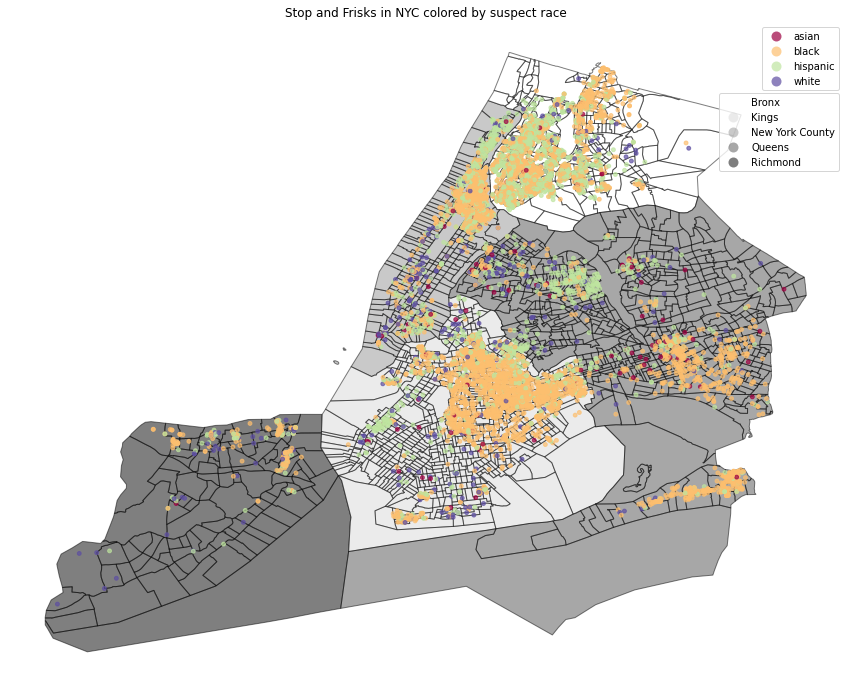

In [52]:
import matplotlib.pyplot as plt

def plot_stop_and_frisks():
    fig, ax = plt.subplots(figsize=(15,15))
    df_nyc_filtered.plot(
        ax=ax, 
        alpha=0.5, 
        #zorder=1, 
        edgecolor="black",
        column='county_label',
        categorical=True,
        legend=True,
        cmap='Greys'
    )
    leg1 = ax.get_legend()
    leg1.set_bbox_to_anchor((0.8, 0.7, 0.2, 0.2))
    sampled_frisks.plot(
        ax=ax, 
        markersize=15, 
        alpha=0.7, 
        column=sampled_frisks.race_updated, 
        categorical=True,
        legend=True,
        marker="o", 
        zorder=2,
        cmap='Spectral'
    )
    ax.set_title("Stop and Frisks in NYC colored by suspect race")
    # Add second legend
    # leg1 will be removed from figure
    # leg2 = ax.legend(loc='lower left')
    # Manually add the first legend back
    ax.add_artist(leg1)
    ax.set_axis_off()

plot_stop_and_frisks()

From the plot we observe that the majority of stop & frisks generally target black & hispanic suspects. The stop & frisks primarily occur in Queens (black & hispanic suspects), Kings County (black suspects) and the Bronx/upper New York County (black & hispanic suspects). White and Asian suspects are generally not targeted and relatively few stop and frisks occur in Richmond (Staten Island) and lower New York County (Manhattan).

## Part 2
#### Use the layer 'X03_HISPANIC_OR_LATINO_ORIGIN' in Census data shapefile, make four maps: 

1) plotting the fraction of each block group which is white; 
2) plotting the fraction of each block group which is black; 
3) plotting the fraction of each block group which is Hispanic;
4) plotting the fraction of each block group which is Asian.

Use the color of each block group to show the race fractions. You do not need to use the stop and frisk data for this part. To find the meaning of each column, use the metadata file which is also included in the Census shapefile. You can read in the metadata file using 

`metadata=gpd.read_file('ACS_2012_5YR_TRACT_36_NEW_YORK.gdb', layer='TRACT_METADATA_2012')`


In [53]:
df_hispanic_origin = gpd.read_file('A3_data/ACS_2012_5YR_TRACT_36_NEW_YORK.gdb', layer='X03_HISPANIC_OR_LATINO_ORIGIN').set_index("GEOID")
metadata = gpd.read_file('A3_data/ACS_2012_5YR_TRACT_36_NEW_YORK.gdb', layer='TRACT_METADATA_2012')

#for col in df_hispanic_origin.columns:
#    print(col, metadata[metadata.Short_Name == col].Full_Name.values)

map_short_name = {
    "Total": "B03001e1",
    "Hispanic": "B03001e3",
    "White": "B03002e3",
    "Black": "B03002e4",
    "Asian": "B03002e6"
}

df_hispanic_origin

,B03001e1,B03001m1,B03001e2,B03001m2,B03001e3,B03001m3,B03001e4,B03001m4,B03001e5,B03001m5,...,B03002m20,B03002e21,B03002m21,B03003e1,B03003m1,B03003e2,B03003m2,B03003e3,B03003m3,geometry
GEOID,,,,,,,,,,,,,,,,,,,,,
14000US36001000100,2235,294,1868,291,367,202,175,148,144,136,...,12,0,12,2235,294,1868,291,367,202,None
14000US36001000200,5412,792,4896,764,516,239,0,17,335,144,...,17,0,17,5412,792,4896,764,516,239,None
14000US36001000300,6421,740,5479,707,942,541,11,15,829,545,...,111,54,53,6421,740,5479,707,942,541,None
14000US36001000401,2412,188,2358,197,54,52,27,44,27,29,...,44,0,12,2412,188,2358,197,54,52,None
14000US36001000403,4540,500,4469,521,71,73,0,12,0,12,...,12,0,12,4540,500,4469,521,71,73,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14000US36123150100,6117,337,5941,334,176,86,55,40,112,81,...,16,6,12,6117,337,5941,334,176,86,None
14000US36123150200,5873,352,5781,348,92,47,0,17,60,45,...,17,0,17,5873,352,5781,348,92,47,None
14000US36123150300,5267,318,5225,323,42,39,13,15,22,30,...,17,0,17,5267,318,5225,323,42,39,None


In [54]:
for key, col in map_short_name.items():
    df_nyc_filtered[f"{key}-fraction"] = df_nyc_filtered.GEOID_Data.apply(
        lambda geoid: df_hispanic_origin.loc[geoid][col] / df_hispanic_origin.loc[geoid][map_short_name["Total"]]
    )

/Users/daan/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


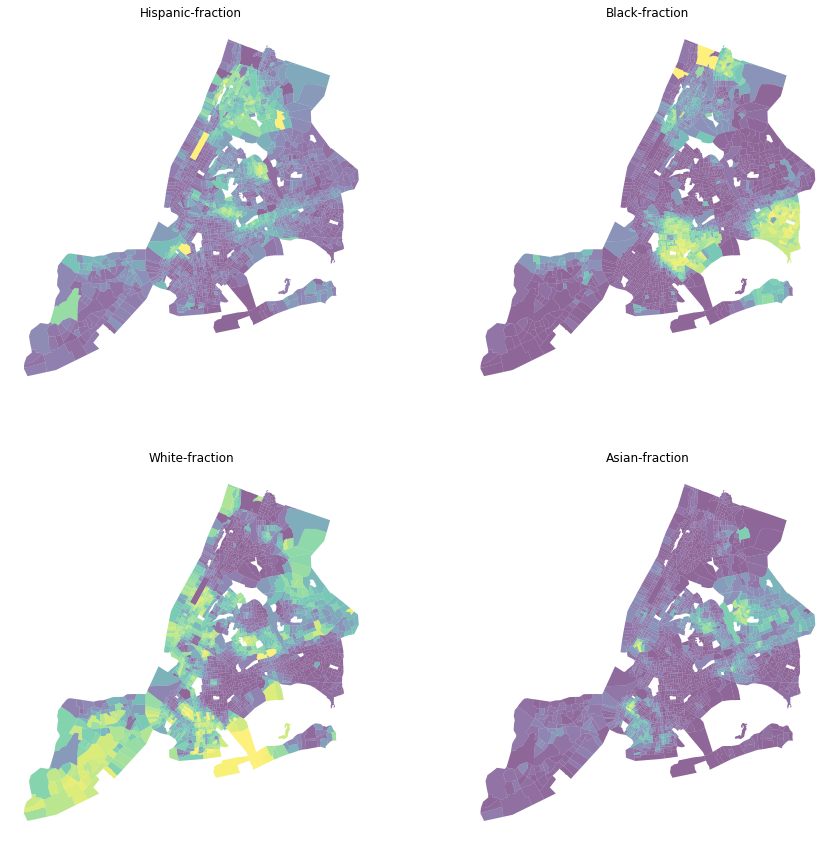

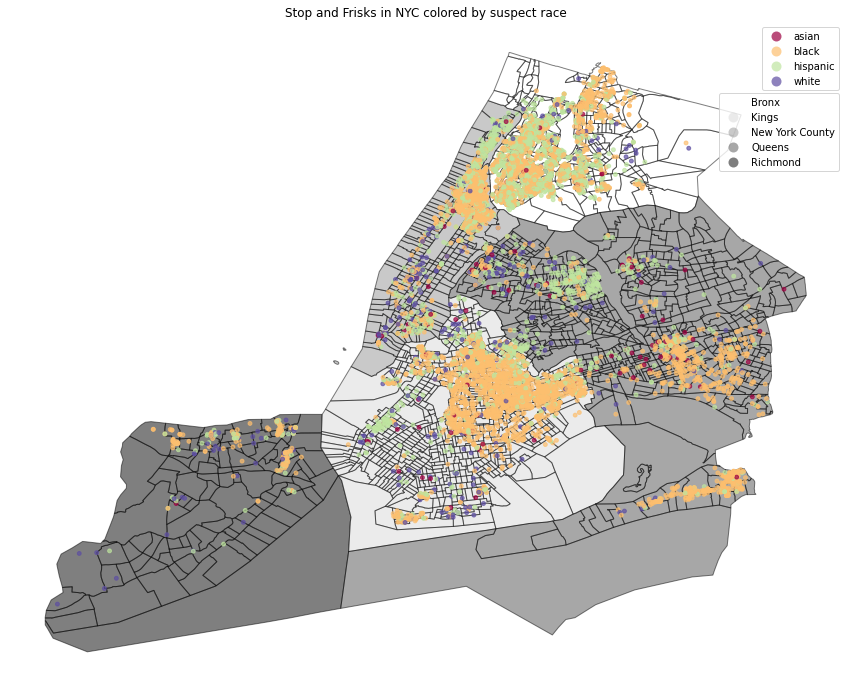

In [55]:
# Plot
fig, axs = plt.subplots(2, 2, figsize=(15,15))
idx = 0
for key in map_short_name.keys():
    if key != "Total":
        row = idx % 2
        col = idx // 2
        ax = axs[row, col]
        col = f"{key}-fraction"
        df_nyc_filtered.plot(
            ax=ax, 
            alpha=0.6, 
            zorder=1, 
            column=col
        )
        ax.set_title(col)
        ax.set_axis_off()
        idx += 1

plot_stop_and_frisks()

#### Look at the maps from part 1 and part 2 side by side and write a few sentences summarizing your conclusions. (25 points)

Through analyzing the maps side by side, we can clearly infer that in predominantly white areas there were almost no stop and frisks, while in areas with high proportion of black and hispanic populations there were a lot of stop and frisks targeting those populations. This strongly suggests that there might be a discriminatory bias towards targeting black and hispanic people in stop and frisks done by the New York Police. We could also analyze the relative size of the population and number of crimes committed by each suspected race to make a stronger case.

## Part 3
#### Merge [NYPD's population and precinct data](https://johnkeefe.net/nyc-police-precinct-and-census-data) (nyc_2010pop_2020precincts.csv and geo_export.shp) to create a new geodata. (Please refer to the "census codebook page" in the data folder for the meanings of different columns in the police precinct dataset.) 
#### Map each stop from the stop and frisk data from part 1 to a police precinct using a [spatial join](https://geopandas.org/gallery/spatial_joins.html) as discussed in class. And this time, please use the full data of "stop and frisk", rather than the 10,000 sample.
#### Make a plot where each point represents one police precinct with more than 100 residents, the x-axis is the proportion of the police precinct population which is white, and the y-axis is the number of stops per capita (ie, the number of stops in the precinct, of pedestrians of all races, divided by the population in the precinct). Add a regression line, using scipy.stats.linregress to show the trend in this plot. (20 points)

In [56]:
df_precinct = pd.read_csv("A3_data/nyc_2010pop_2020precincts.csv")
df_precinct.shape

(77, 145)

In [57]:
precinct_shapes = gpd.read_file("NYC_Police_Precincts_2020/geo_export.shp")
precinct_shapes.shape

DriverError: NYC_Police_Precincts_2020/geo_export.shp: No such file or directory

In [ ]:
gdf_precinct = gpd.GeoDataFrame(precinct_shapes.merge(df_precinct, left_on='precinct', right_on='precinct_2020'))
gdf_precinct.shape

# Spatial join between data
First, remove entries in `gdf` for which the geometry is `NaN`.

In [ ]:
gdf = gdf[(gdf.lon.notna()) & (gdf.lat.notna())]
gdf.shape

In [ ]:
gdf_precinct.crs = 'EPSG:4326'
gdf.crs = 'EPSG:4326'

In [ ]:
gdf_joined = gdf.sjoin(gdf_precinct, how='inner')

In [ ]:
gdf_joined[gdf_joined.precinct == 1].shape[0]

# Plot
First, we select the valid precincts. 

In [58]:
valid_precincts = gdf_precinct[gdf_precinct.P0010001 > 100].precinct_2020.unique()
len(valid_precincts)

NameError: name 'gdf_precinct' is not defined

Then, we want to find the proportion of white population in each precinct. 

In [ ]:
gdf_precinct['white_prop'] = gdf_precinct.P0010003 / gdf_precinct.P0010001
gdf_precinct.white_prop.head()

0    0.757120
1    0.255593
2    0.855382
3    0.381865
4    0.630208
Name: white_prop, dtype: float64

Now, we are interested in the number of stops per capita.

In [ ]:
gdf_precinct[gdf_precinct.precinct_2020 == 20]

,precinct_2020,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,...,P0020069,P0020070,P0020071,P0020072,P0020073,precinct,shape_area,shape_leng,geometry,white_prop
11,20,102624,100080,84116,4511,183,9024,34,2212,2544,...,0,0,0,0,0,17.0,2.226969e+07,26622.002669,"MULTIPOLYGON (((-73.96421 40.74660, -73.96427 ...",0.819652


In [ ]:
white = []
stops_per_capita = []

for valid_precinct in valid_precincts:
    precinct_white_prop = gdf_precinct[gdf_precinct.precinct_2020 == valid_precinct].white_prop.values[0]
    white.append(precinct_white_prop)
    # total stops
    total_stops = gdf_joined[gdf_joined.precinct_2020 == valid_precinct].shape[0]
    # population
    population = gdf_precinct[gdf_precinct.precinct_2020 == valid_precinct].P0010001
    per_capita = total_stops / population
    stops_per_capita.append(per_capita.values[0])
    print(valid_precinct, per_capita)

1 0    0.006434
Name: P0010001, dtype: float64
5 1    0.009188
Name: P0010001, dtype: float64
6 2    0.00728
Name: P0010001, dtype: float64
7 3    0.048354
Name: P0010001, dtype: float64
9 4    0.021022
Name: P0010001, dtype: float64
10 5    0.0277
Name: P0010001, dtype: float64
13 6    0.013595
Name: P0010001, dtype: float64
14 7    0.008668
Name: P0010001, dtype: float64
17 8    0.003665
Name: P0010001, dtype: float64
18 9    0.010635
Name: P0010001, dtype: float64
19 10    0.011102
Name: P0010001, dtype: float64
20 11    0.001988
Name: P0010001, dtype: float64
23 13    0.006265
Name: P0010001, dtype: float64
24 14    0.004631
Name: P0010001, dtype: float64
25 15    0.240987
Name: P0010001, dtype: float64
26 16    0.023713
Name: P0010001, dtype: float64
28 17    0.137893
Name: P0010001, dtype: float64
30 18    0.122963
Name: P0010001, dtype: float64
32 19    0.035099
Name: P0010001, dtype: float64
33 20    0.053523
Name: P0010001, dtype: float64
34 21    0.024854
Name: P0010001, dtyp

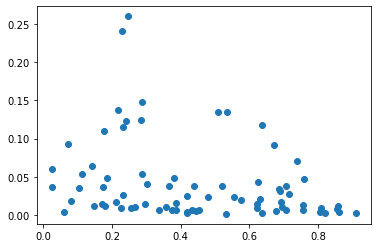

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(white, stops_per_capita)

Text(0, 0.5, 'Stop and frisk per capita')

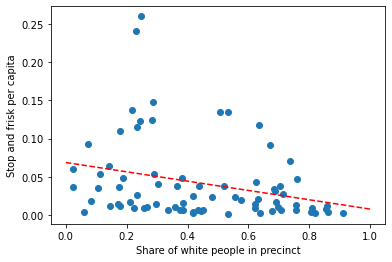

In [ ]:
from scipy.stats import linregress
import numpy as np

slope, intercept, r, p, se = linregress(white, stops_per_capita)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', c='r')
plt.scatter(white, stops_per_capita)
plt.xlabel("Share of white people in precinct")
plt.ylabel("Stop and frisk per capita")

#### Now make three more plots where you change the x-values to be the proportion of the precinct population which is Black, Hispanic, or Asian. Keep the same y-values. Add a regression line to each plot. Summarize the conclusions from all four plots. (20 points)

In [ ]:
gdf_precinct['black_prop'] = gdf_precinct.P0010004 / gdf_precinct.P0010001
gdf_precinct['asian_prop'] = gdf_precinct.P0010006 / gdf_precinct.P0010001
gdf_precinct['hispanic_prop'] = gdf_precinct.P0020002 / gdf_precinct.P0010001

gdf_precinct[['black_prop', 'asian_prop', 'hispanic_prop']].head()

,black_prop,asian_prop,hispanic_prop
0,0.032424,0.158506,0.070127
1,0.052960,0.623859,0.112426
2,0.021149,0.080722,0.060762
3,0.106326,0.342969,0.318978
4,0.090316,0.143192,0.239276


In [ ]:
black = []
hispanic = []
asian = []
stops_per_capita = []

for valid_precinct in valid_precincts:
    precinct_black_prop = gdf_precinct[gdf_precinct.precinct_2020 == valid_precinct].black_prop.values[0]
    black.append(precinct_black_prop)
    precinct_hispanic_prop = gdf_precinct[gdf_precinct.precinct_2020 == valid_precinct].hispanic_prop.values[0]
    hispanic.append(precinct_hispanic_prop)
    precinct_asian_prop = gdf_precinct[gdf_precinct.precinct_2020 == valid_precinct].asian_prop.values[0]
    asian.append(precinct_asian_prop)
    # total stops
    total_stops = gdf_joined[gdf_joined.precinct_2020 == valid_precinct].shape[0]
    # population
    population = gdf_precinct[gdf_precinct.precinct_2020 == valid_precinct].P0010001
    per_capita = total_stops / population
    stops_per_capita.append(per_capita.values[0])

Text(0, 0.5, 'Stop and frisk per capita')

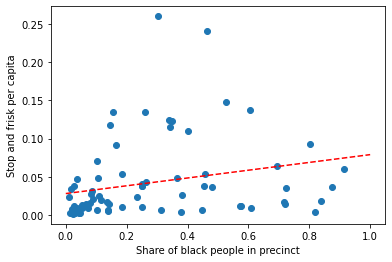

In [ ]:
slope, intercept, r, p, se = linregress(black, stops_per_capita)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', c='r')
plt.scatter(black, stops_per_capita)
plt.xlabel("Share of black people in precinct")
plt.ylabel("Stop and frisk per capita")

Text(0, 0.5, 'Stop and frisk per capita')

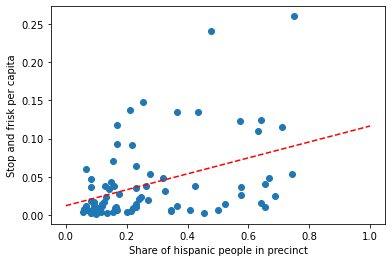

In [ ]:
slope, intercept, r, p, se = linregress(hispanic, stops_per_capita)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', c='r')
plt.scatter(hispanic, stops_per_capita)
plt.xlabel("Share of hispanic people in precinct")
plt.ylabel("Stop and frisk per capita")

Text(0, 0.5, 'Stop and frisk per capita')

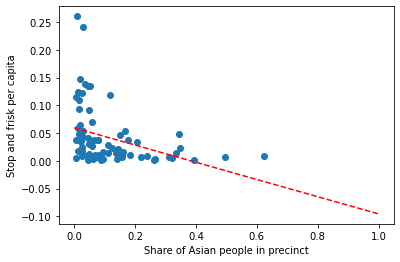

In [ ]:
slope, intercept, r, p, se = linregress(asian, stops_per_capita)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', c='r')
plt.scatter(asian, stops_per_capita)
plt.xlabel("Share of Asian people in precinct")
plt.ylabel("Stop and frisk per capita")

First, we notice that precincts with a higher of proportion of white and Asian population generally correlate with lower stop and frisk rates (per capita). Conversely, precincts with a higher share of Hispanic and black populations have a higher rate of stop and frisks. Second, note that we have looked at total stop and frisk per capita, rather than for the individual demographic groups. It may therefore be the case (although not likely) that, even when a precinct has a higher share of black and Hispanic people, it is white and Asian people that are targeted by the stop and frisk. Third, there are relatively few precinct with a high share of Asian population. Therefore, the regression line for the corresponding plot has negative y-values after a share of about 40%.  

## Part 4
#### Read http://www.stat.columbia.edu/~gelman/research/published/frisk9.pdf. Summarize the argument it is responding to, and the counterargument it makes. (10 points)

The article is responding to the argument that, even if people from certain races are more likely to be subject to police stops, this is due to the fact that this race is either more engaged in criminal activities compared to other races, or this is because specific social areas have higher crime rates, which are reflected in the stop rates. 

The article looks into the validity of these claims. The authors do so by looking into a dataset of 175,000 records of stops, recorded from January 1998 to March 1999. First, they note that black and hispanic people are overrepresented in the stop and frisk data compared to their respective share of population. To consider the claim whether these groups are engaged more in criminal activity, they use arrests as a proxy of criminal activity. 

They then look at disaggregating the data by police precinct, to see if it is e.g. the case that police stop more people in high-crime areas but treat the different ethnic groups equally. To do so, they build a Poisson model. When using the previous year's arrest data as a baseline, their results show that in the cases of violent crimes and weapons crime (69% of all stops), black and hispanic people are stopped at a consistently higher rate than white people, regardless of the population distribution in precincts. With this data, they thus refute the argument that the article is responding to. 